In [2]:
import numpy as np
import matplotlib.pyplot as plt


def sinc_basis(x, rij):
    return np.sinc(x * rij / np.pi)

def gaussian_basis(x, gamma, mu=0):
    return np.exp(-gamma * np.linalg.norm(mu-x)**2)

qlen = 80
qvector = np.linspace(0, 10, qlen, endpoint=True)
t = np.array([99.98288073, 99.62024345, 98.54399384, 96.78833332, 94.40773278, 91.47342414,
 88.06901975, 84.28569285, 80.21735849, 75.95624456, 71.58915219, 67.19459096,
 62.84085871, 58.58503323, 54.4727659,  50.53871935, 46.80747232, 43.29471893,
 40.0086111,  36.95112285, 34.11934839, 31.50667737, 29.10381671, 26.8996495,
 24.88193524, 23.03786505, 21.3544899,  19.8190416,  18.41916555, 17.14308251,
 15.97969429, 14.91864588, 13.95035402, 13.06601056, 12.25756688, 11.51770475,
 10.83979772, 10.21786627,  9.64652955,  9.12095578,  8.63681285,  8.1902206,
  7.77770543,  7.39615809,  7.04279474,  6.71512153,  6.41090268,  6.12813181,
  5.86500639,  5.61990496,  5.39136689,  5.17807445,  4.97883682,  4.79257596,
  4.61831401,  4.45516211,  4.30231058,  4.15902009,  4.02461395,  3.89847132,
  3.78002116,  3.66873702,  3.56413239,  3.46575667,  3.37319166,  3.28604847,
  3.20396478,  3.12660255,  3.05364586,  2.98479913,  2.91978545,  2.8583452,
  2.80023469,  2.74522505,  2.69310121,  2.64366092,  2.59671394,  2.55208126,
  2.50959446,  2.469095  ])  # water I(q) IAM 

[ 3.00027499e+00  1.50682780e+02 -1.74107488e+03  1.35922945e+04
 -5.84348803e+04  1.49244000e+05 -2.30982052e+05  2.12590721e+05
 -1.06978321e+05  2.26556902e+04]
0.04320097744425383
[100.06101964  99.67343409  98.53609629  96.71696881  94.30590447
  91.39196956  88.04950034  84.3383041   80.31545066  76.04998065
  71.63079786  67.16226602  62.74895907  58.47676153  54.39919353
  50.53494633  46.87704429  43.40879883  40.11925228  37.01190975
  34.10422203  31.4194982   28.97577849  26.77672131  24.80796949
  23.0398075   21.43446032  19.95500971  18.5728816   17.27188564
  16.04825576  14.90744835  13.85921818  12.91261891  12.07220138
  11.3360613   10.69576581  10.13773561   9.64544214   9.20177726
   8.79109739   8.40065125   8.02130285   7.64761573   7.27745543
   6.91129871   6.5514255    6.20113151   5.86405217   5.54364378
   5.24283217   4.96381478   4.70798852   4.47597076   4.26768182
   4.08246177   3.91920037   3.77646494   3.6526166    3.54590959
   3.45457168   3.376865

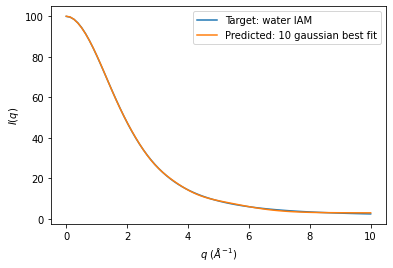

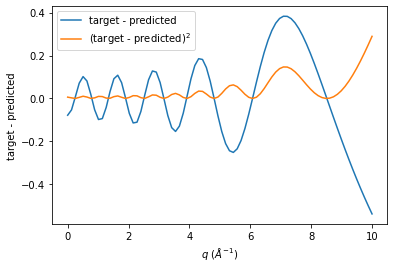

In [3]:
M = 10
# Calculate design matrix Phi
Phi = np.ones((t.shape[0], M))
a = 0.1
b = 1
gamma = np.linspace(a, b, M)
for m in range(M - 1):
    Phi[:, m + 1] = np.vectorize(gaussian_basis)(qvector, gamma[m])

# Calculate parameters w and alpha
w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ t
alpha = sum((t - Phi @ w)**2) / len(t)
predicted = Phi @ w
print(w)
print(alpha)
print(predicted)

# plots
plt.plot(qvector, t)
plt.plot(qvector, predicted)
plt.xlabel('$q\ (\AA^{-1}$)')
plt.ylabel('$I(q)$')
plt.legend(('Target: water IAM','Predicted: %d gaussian best fit' % M))
plt.show()
diff = t - predicted
plt.plot(qvector, diff)
residual = (t - predicted)**2
plt.plot(qvector, residual)
plt.xlabel('$q\ (\AA^{-1})$')
plt.ylabel('target - predicted')
plt.legend(('target - predicted','(target - predicted)$^2$'))
plt.show()

rij + noise
[0.49861875 0.74005156 0.97309824 1.20983856 1.44805351 1.68297586
 1.92102648 2.15698211 2.39855296 2.63544594 2.87004979 3.10321706
 3.34306236 3.58056912 3.8140502  4.04958409 4.28938209 4.52470682
 4.76099091 5.00016287]
[ 1.31107188e+02 -8.16389279e+02  2.20203183e+03 -3.87025451e+03
  5.45640906e+03 -6.81336970e+03  7.62023224e+03 -7.77478411e+03
  7.31412114e+03 -6.48702027e+03  5.52039396e+03 -4.33190284e+03
  3.06309101e+03 -1.97885337e+03  1.21017853e+03 -6.65600918e+02
  3.11795218e+02 -1.23656200e+02  3.97182256e+01 -7.23543443e+00]
0.0014586560930346618


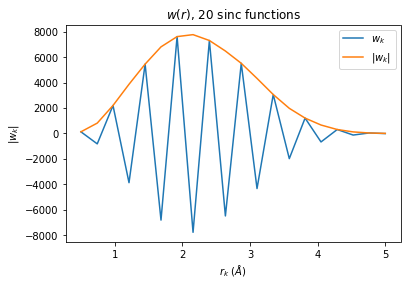

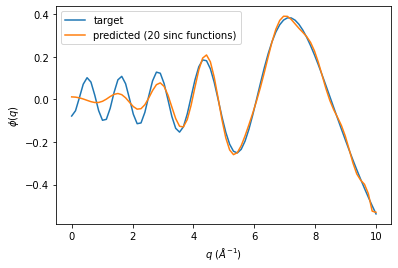

rij + noise
[0.49952511 0.59179658 0.68415893 0.77560336 0.86741047 0.95718922
 1.05142056 1.14400593 1.2345374  1.32604101 1.41945506 1.51009575
 1.60233608 1.69470998 1.78491534 1.87751187 1.96738611 2.06305031
 2.15273674 2.24392534 2.33639461 2.4292599  2.52127344 2.61368149
 2.70373654 2.79614249 2.88838717 2.9802488  3.07294254 3.16177476
 3.25335197 3.34771681 3.43895888 3.52986869 3.62363466 3.71521801
 3.80563775 3.89718925 3.98932952 4.08000512 4.17319336 4.26609942
 4.35597291 4.44872763 4.5414491  4.63284155 4.72529014 4.81482532
 4.90928913 5.00239882]
[-4.60574665e+08  5.11353576e+10 -2.57969905e+11  6.29443861e+11
 -9.10038394e+11  7.46843997e+11 -1.09786666e+11 -5.44975921e+11
  6.71660506e+11 -1.56861249e+11 -5.72917005e+11  1.03155078e+12
 -1.05768756e+12  8.15856458e+11 -5.61011316e+11  3.62000015e+11
 -2.15304946e+11  1.12245708e+11 -4.59640414e+10  1.34635683e+10
  1.21704967e+09 -5.15520375e+09  4.55456228e+09 -2.75901402e+09
  1.32027651e+09 -5.51205223e+08  1.94

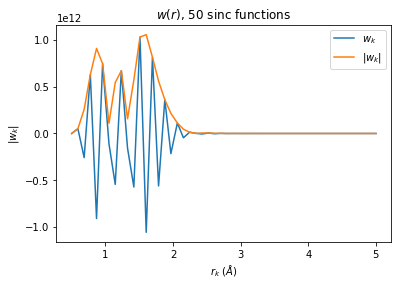

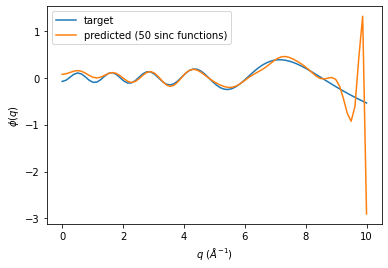

rij + noise
[0.50037575 0.54504654 0.59118796 0.63717015 0.68186111 0.72678426
 0.77319905 0.81817449 0.86327602 0.90907648 0.95435209 0.99989987
 1.04600928 1.09014788 1.13656003 1.18168722 1.22764931 1.27266618
 1.31873724 1.3629089  1.40863995 1.45453427 1.50014646 1.54534073
 1.59078258 1.63659904 1.68084383 1.72711313 1.77238904 1.8182383
 1.86323358 1.90936551 1.95512907 1.99968406 2.04539896 2.0901066
 2.13594932 2.1825339  2.22696436 2.2727228  2.31796985 2.36378654
 2.40869934 2.45468596 2.49998863 2.5453441  2.59103574 2.6359162
 2.68222467 2.72748896 2.7735419  2.81822502 2.86339766 2.90900653
 2.95374154 2.99996027 3.04579496 3.09048569 3.13635431 3.1821845
 3.2278107  3.27262968 3.31813901 3.36451858 3.40898492 3.45499924
 3.49987516 3.54497406 3.59068232 3.63613251 3.68187783 3.72754944
 3.77223804 3.81836347 3.86290981 3.90873689 3.9542958  3.99982399
 4.04522679 4.09062719 4.13623486 4.18212074 4.227752   4.27226724
 4.31793401 4.36436342 4.409315   4.45445512 4.5005616

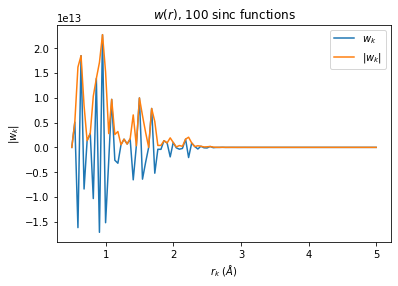

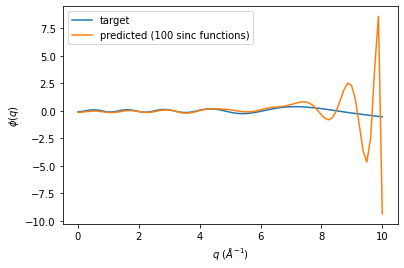

In [4]:
M = (20, 50, 100)  # number of basis functions
noise_on = True
noise_parameter = 0.01
rmin = 0.5
rmax = 5
for j in range(len(M)):
    # Calculate design matrix Phi
    Phi = np.ones((t.shape[0], M[j]))
    rij = np.linspace(rmin, rmax, M[j], endpoint=True)
    #print('rij')
    #print(rij)
    dr = rij[1] - rij[0]
    if noise_on:
        noise = np.random.normal(0, noise_parameter*dr , M[j]) 
        # add small normal distribution noise to distances
        rij += noise
        print('rij + noise')
    print(rij)
    for m in range(M[j] - 1):
        Phi[:, m + 1] = np.vectorize(sinc_basis)(qvector, rij[m])

    # Calculate parameters w and alpha
    w = np.linalg.inv(Phi.T @ Phi) @ Phi.T @ diff
    alpha = sum((diff - Phi @ w)**2) / len(diff)
    predicted = Phi @ w
    print(w)
    print(alpha)
    
    plt.plot(rij, w)
    plt.plot(rij, np.abs(w))
    plt.xlabel('$r_{k}$ ($\AA$)')
    plt.ylabel('$|w_k|$')
    plt.legend(('$w_k$', '$|w_k|$'))
    plt.title('$w(r)$, %d sinc functions' % M[j])
    plt.show()

    plt.plot(qvector, diff)
    plt.plot(qvector, predicted)
    plt.xlabel('$q$ ($\AA^{-1}$)')
    plt.ylabel('$\phi(q)$')
    plt.legend(('target', 'predicted (%d sinc functions)' % M[j]))
    #plt.xlim(6, 10)
    #plt.ylim(2.5, 10)
    plt.show()

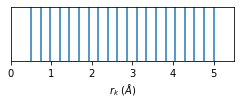

In [17]:
rij = np.linspace(rmin, rmax, 20, endpoint=True)
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)
for k in range(len(rij)):
    plt.axvline(x = rij[k])
plt.xlim((0,5.5))
plt.xlabel('$r_k\ (\AA)$')
ax = plt.gca()

#hide x-axis
ax.get_yaxis().set_visible(False)
